# **Importing Dependencies**

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
import warnings
warnings.filterwarnings('ignore')

# **Load Dataset**

In [ ]:
heart = pd.read_csv('heart.csv')
heart

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [ ]:
heart = heart.rename(columns={'target': 'HeartDisease'})

In [ ]:
heart.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [ ]:
heart.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [ ]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


# **Cheking Null/Duplicated Values**

In [ ]:
heart.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [ ]:
heart.duplicated().sum()

np.int64(1)

# **Data Visualization**

     1 --> Man
     0 --> Woman

In [ ]:
heart.sex.value_counts()

,count
sex,
1,207
0,96


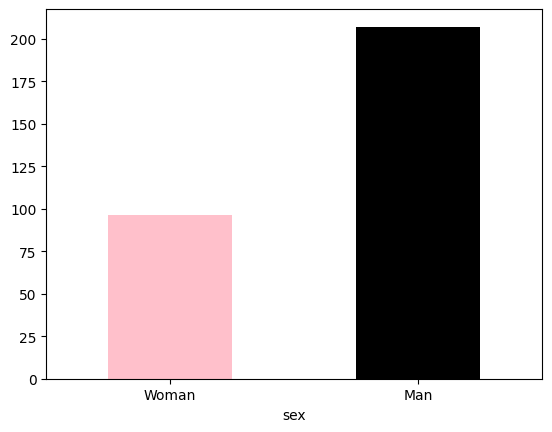

In [ ]:
heart.sex.value_counts().sort_index().plot(kind='bar' , color=['Pink', 'Black'])
plt.xticks(ticks=[0, 1], labels=['Woman', 'Man'], rotation=0)
plt.show()

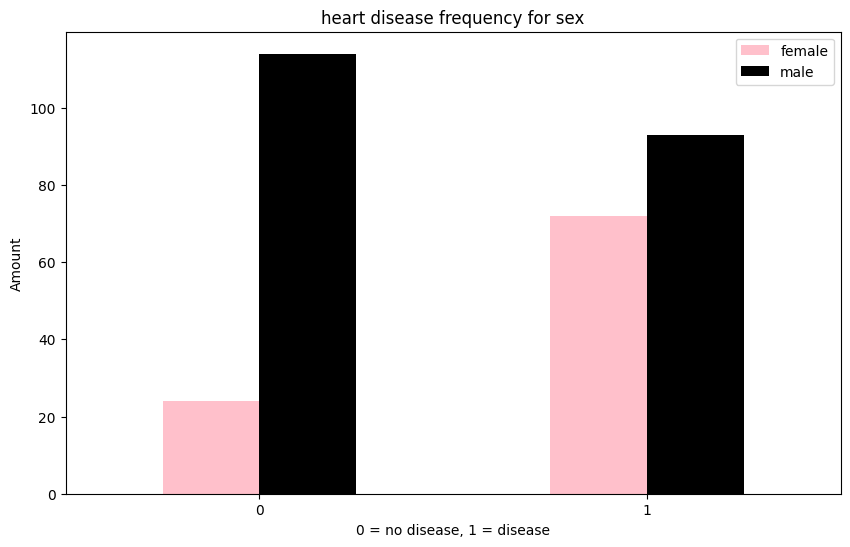

In [ ]:
# Create a plot of crosstab
pd.crosstab(heart.HeartDisease, heart.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["pink","black"])
plt.title("heart disease frequency for sex")
plt.xlabel("0 = no disease, 1 = disease")
plt.ylabel("Amount")
plt.legend(["female", "male"])
plt.xticks(rotation=0);

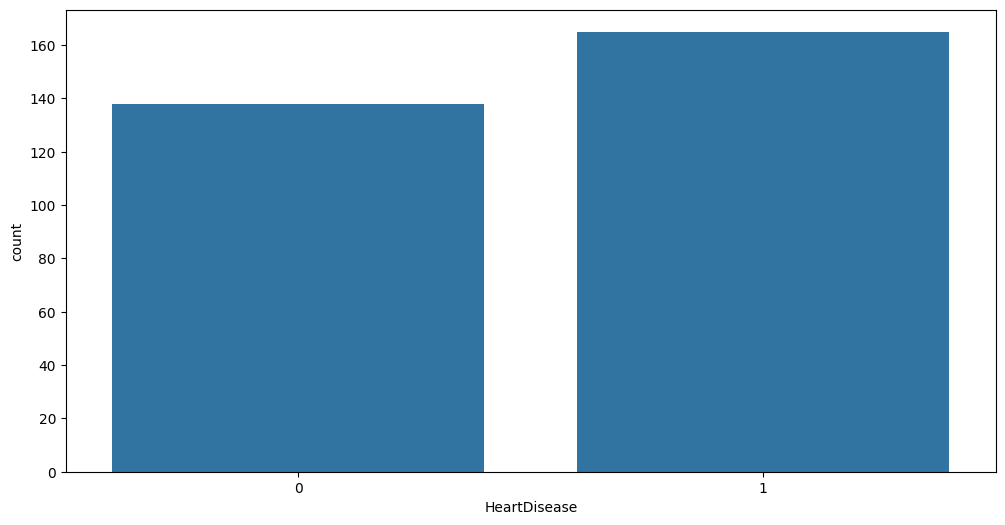

In [ ]:
plt.figure(figsize=(12,6))
sns.countplot(x='HeartDisease', data=heart)
plt.show()

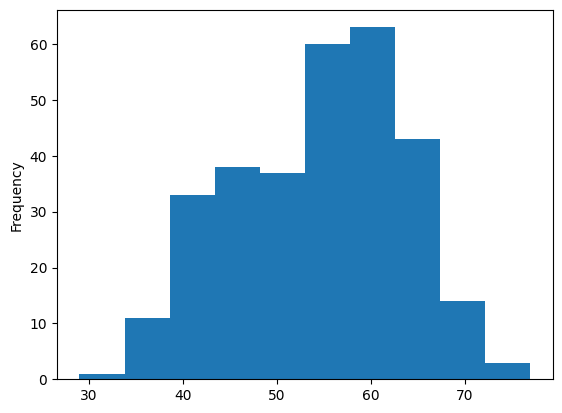

In [ ]:
heart.age.plot(kind='hist')
plt.show()

In [ ]:
heart.cp.value_counts()

,count
cp,
0,143
2,87
1,50
3,23


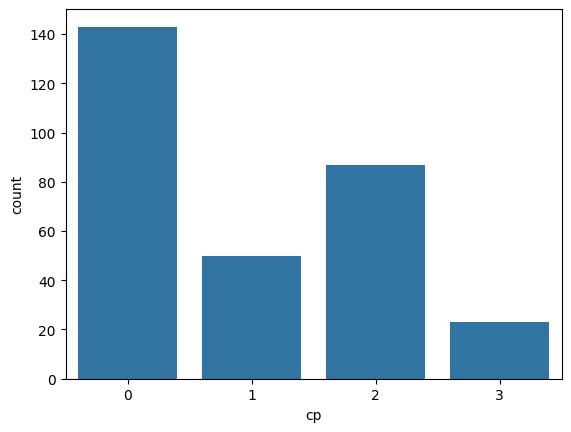

In [ ]:
sns.countplot(x='cp', data=heart)
plt.show()

<Axes: xlabel='oldpeak', ylabel='Density'>

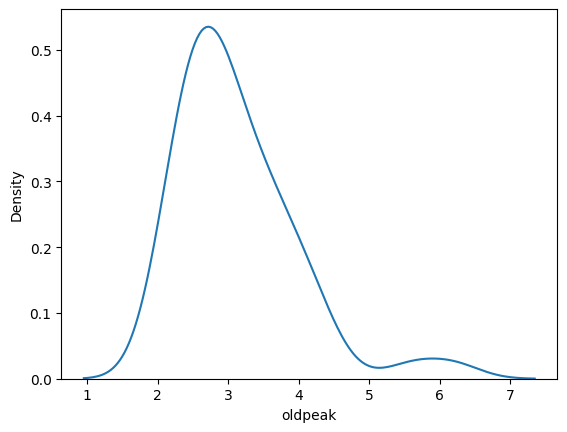

In [ ]:
sns.kdeplot(heart.query("oldpeak>2").oldpeak)

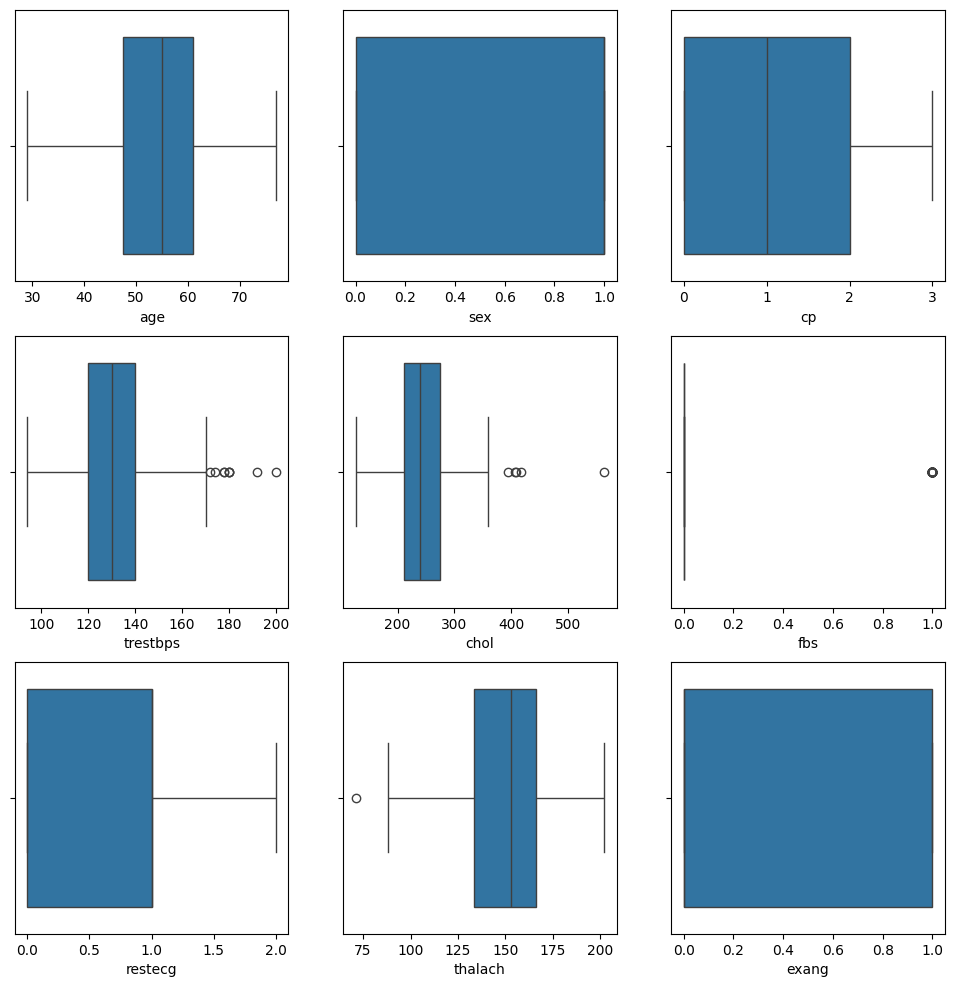

In [ ]:
plt.figure(figsize=(12,12))
for i, col in enumerate(heart.columns[:9]):
  plt.subplot(3,3,i+1)
  sns.boxplot(x=col ,data=heart)
plt.show()

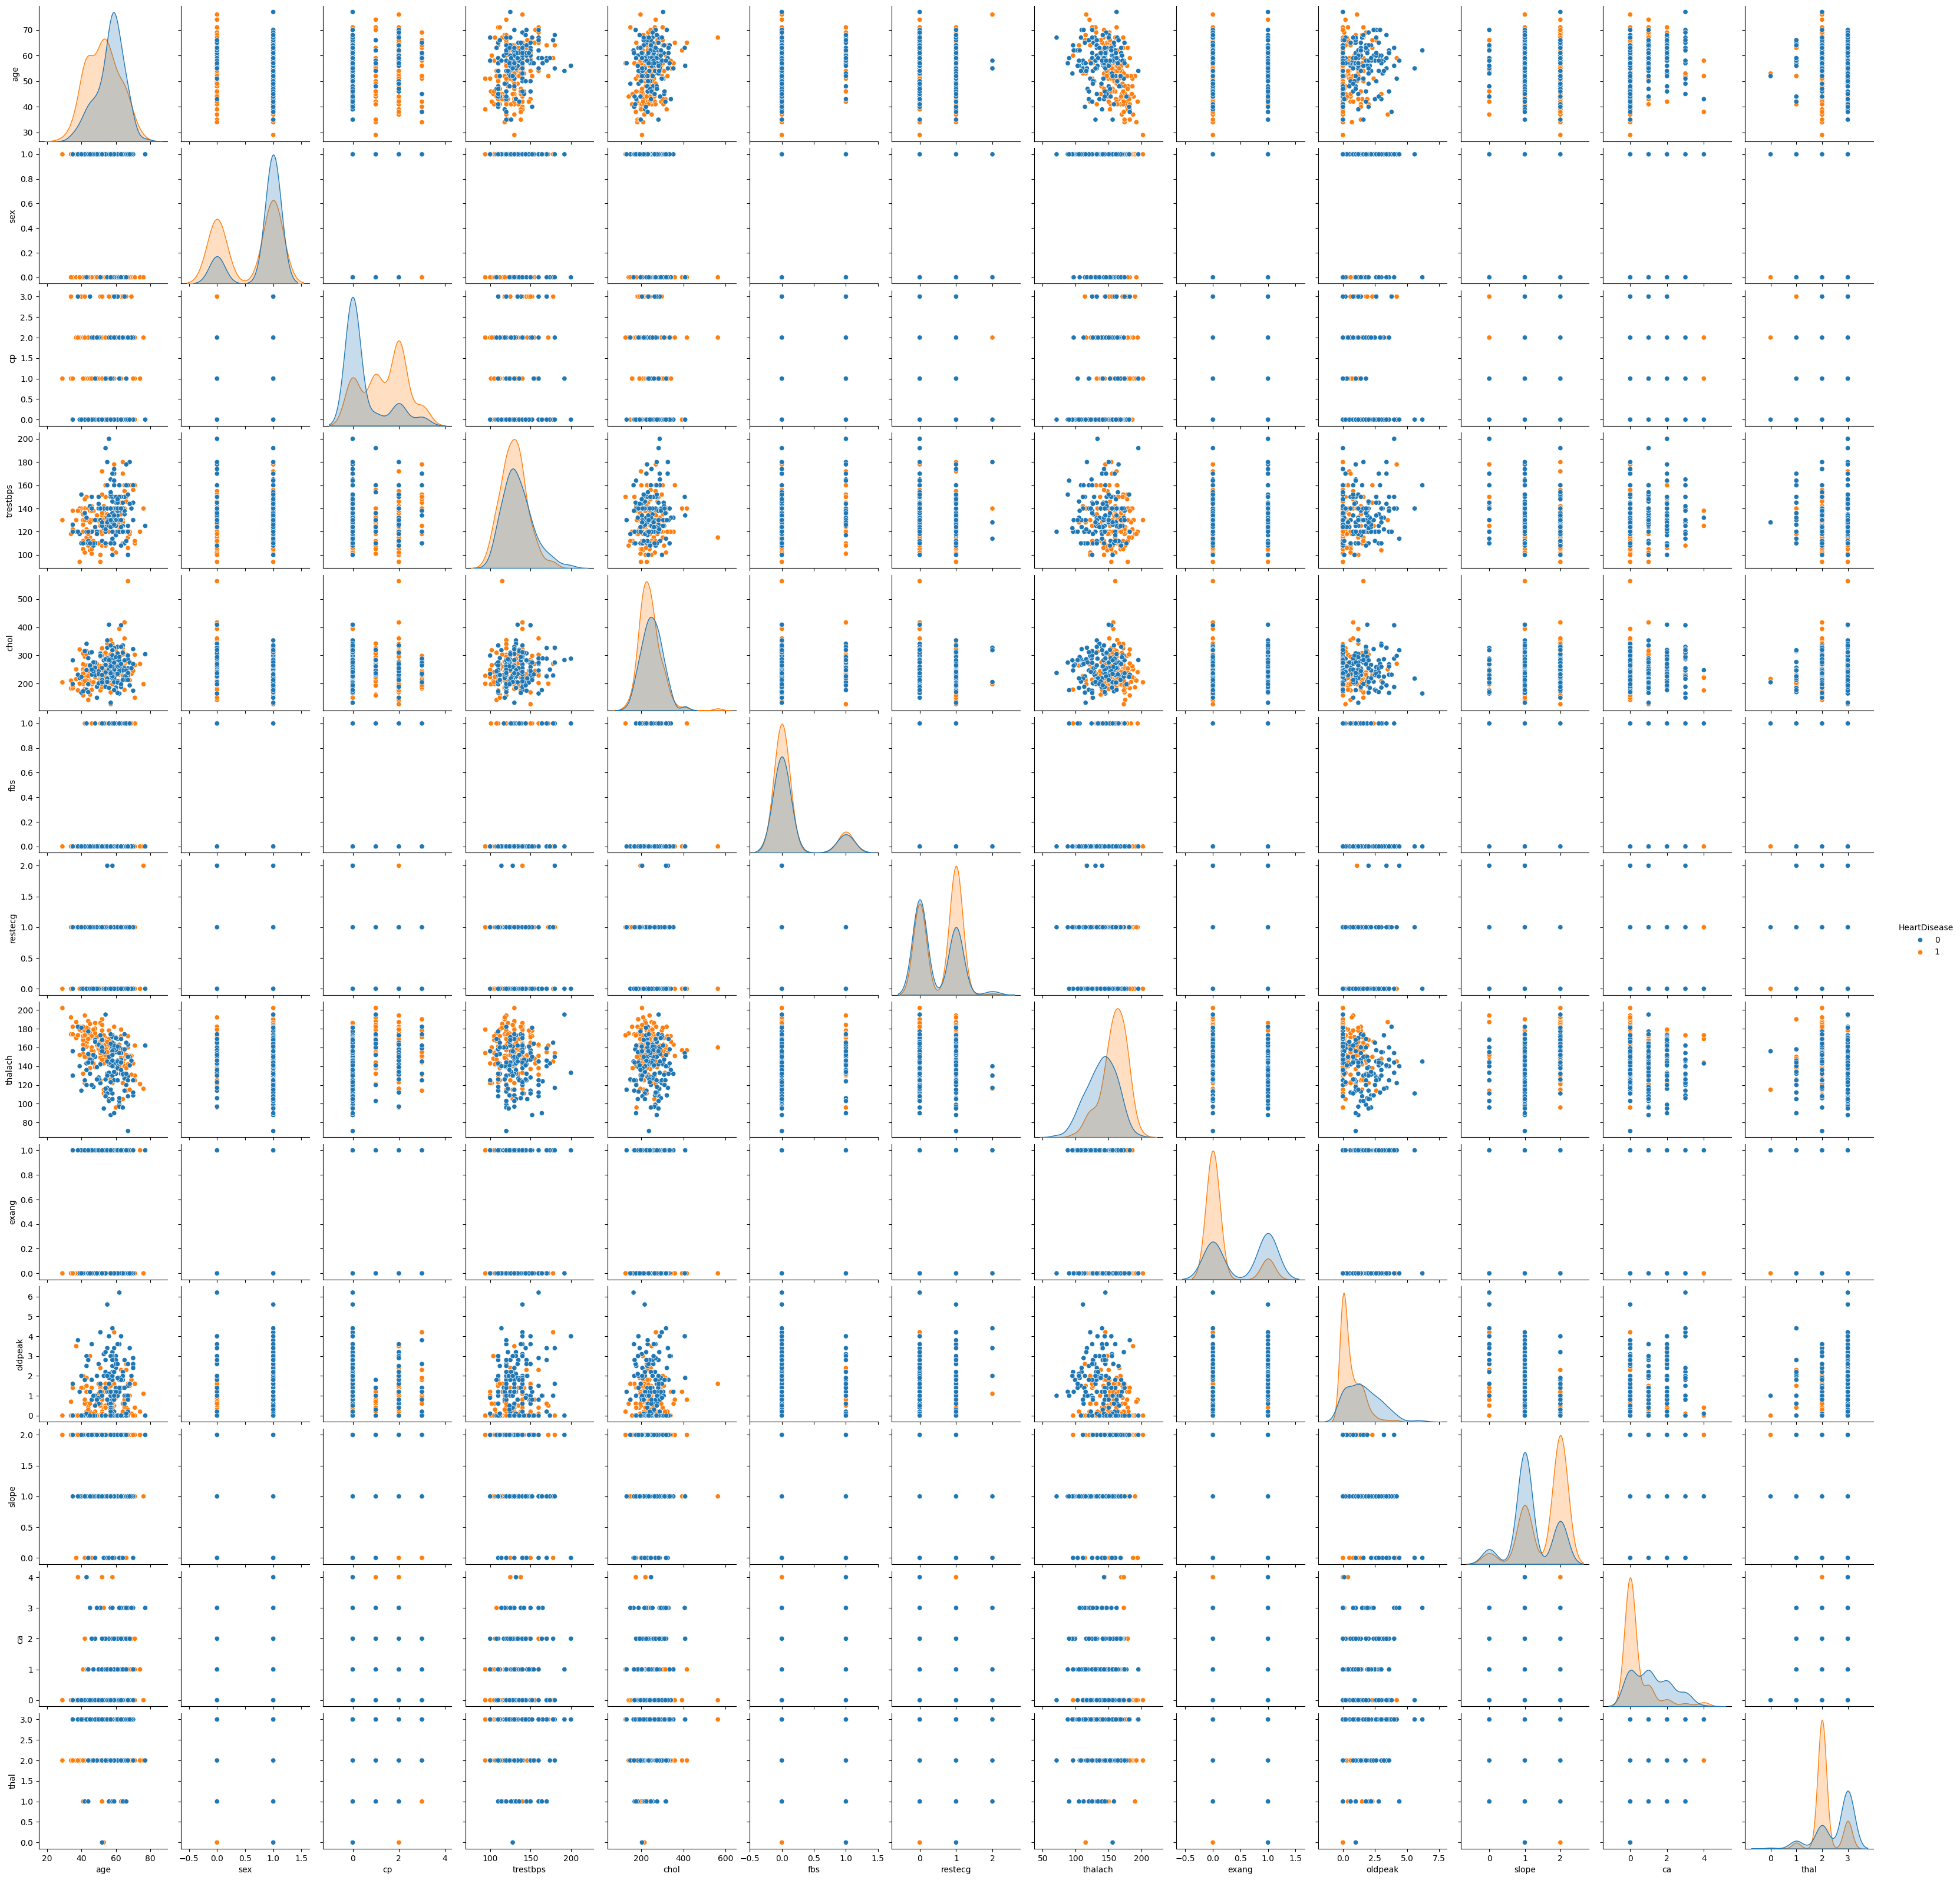

In [ ]:
sns.pairplot(hue='HeartDisease', data=heart)
plt.show()

In [ ]:
cols_with_bad_zero = ["trestbps", "chol"]
for c in cols_with_bad_zero:
    heart[c] = heart[c].replace(0, np.nan)
    heart = heart[heart["trestbps"].between(70, 220)]
    heart= heart[heart["chol"].between(80, 600)]

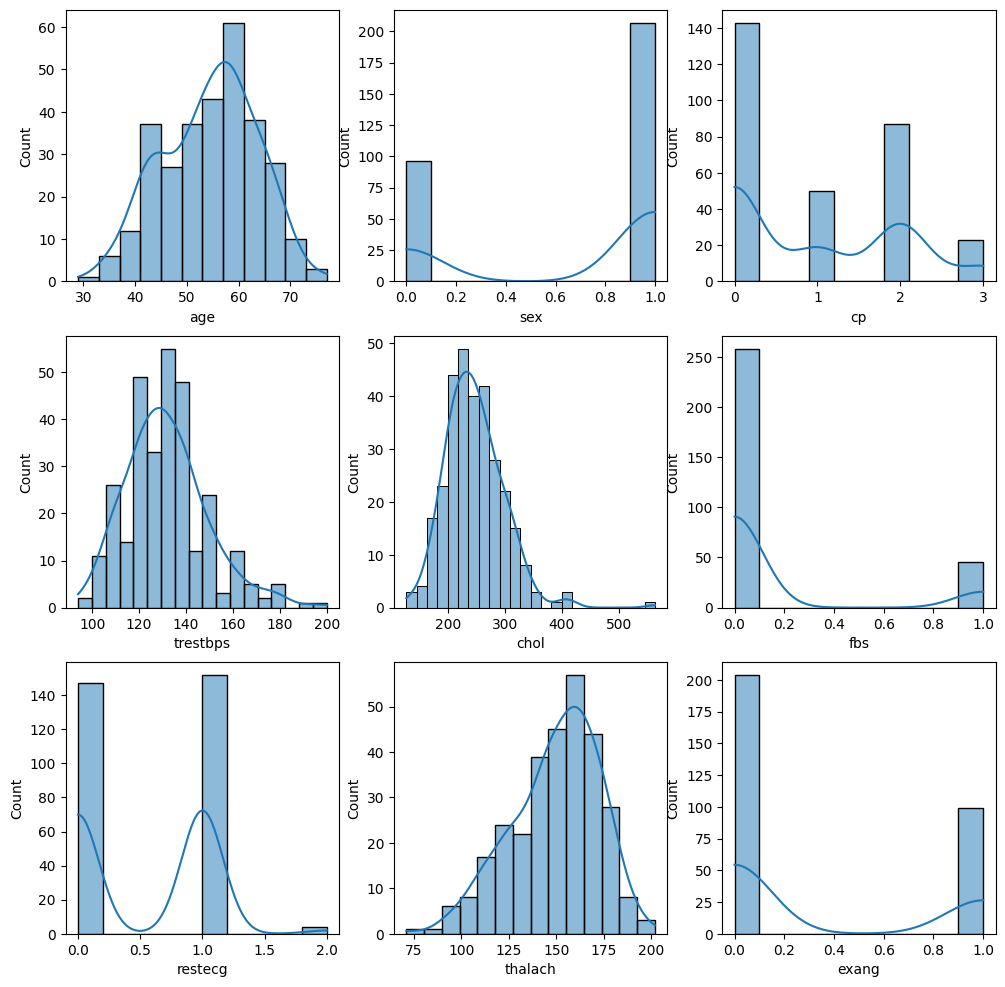

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,12))
for i, col in enumerate(heart.columns[:9]):
  plt.subplot(3,3,i+1)
  sns.histplot(x=col ,data=heart,kde=True)
plt.show()

       0 ---> Has No Heart Disease
       1 ---> Has Heart Disease

In [ ]:
heart['HeartDisease'].value_counts()

,count
HeartDisease,
1,165
0,138


In [ ]:
heart.groupby("HeartDisease").mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
HeartDisease,,,,,,,,,,,,,
0,56.601449,0.826087,0.478261,134.398551,251.086957,0.159420,0.449275,139.101449,0.550725,1.585507,1.166667,1.166667,2.543478
1,52.496970,0.563636,1.375758,129.303030,242.230303,0.139394,0.593939,158.466667,0.139394,0.583030,1.593939,0.363636,2.121212


# **Splitting The Data Into X and Y**

In [ ]:
X = heart.drop(columns='HeartDisease', axis=1)
Y = heart['HeartDisease']

In [ ]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
Y

,HeartDisease
0,1
1,1
2,1
3,1
4,1
...,...
298,0
299,0
300,0
301,0


# **Split Data Into Train and Test Sets**

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, stratify=Y, random_state=2)

In [ ]:
X_train.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
61,54,1,1,108,309,0,1,156,0,0.0,2,0,3
238,77,1,0,125,304,0,0,162,1,0.0,2,3,2
160,56,1,1,120,240,0,1,169,0,0.0,0,0,2
158,58,1,1,125,220,0,1,144,0,0.4,1,4,3
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3
282,59,1,2,126,218,1,1,134,0,2.2,1,1,1
39,65,0,2,160,360,0,0,151,0,0.8,2,0,2
24,40,1,3,140,199,0,1,178,1,1.4,2,0,3
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
171,48,1,1,110,229,0,1,168,0,1.0,0,0,3


In [ ]:
Y_train.head(10)

,HeartDisease
61,1
238,0
160,1
158,1
289,0
282,0
39,1
24,1
188,0
171,0


In [ ]:
X_train.shape

(242, 13)

In [ ]:
X_test.shape

(61, 13)

In [99]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# **Applying Logistic Regression**

In [100]:
model=LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.8461538461538461


In [101]:
cm=confusion_matrix(Y_test,Y_pred)
cm

array([[36,  5],
       [ 9, 41]])

<Axes: >

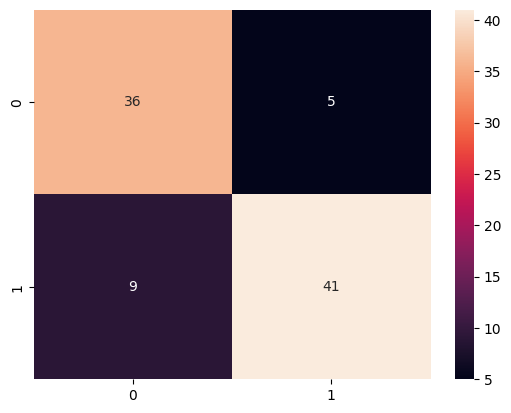

In [102]:
sns.heatmap(cm, annot=True)

# **Applying Decision Tree**

In [103]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(criterion='entropy', random_state = 7)
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7472527472527473


In [104]:
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8292682926829268
Recall: 0.68
F1 Score: 0.7472527472527473


# **Comparing Log-Reg with DT**

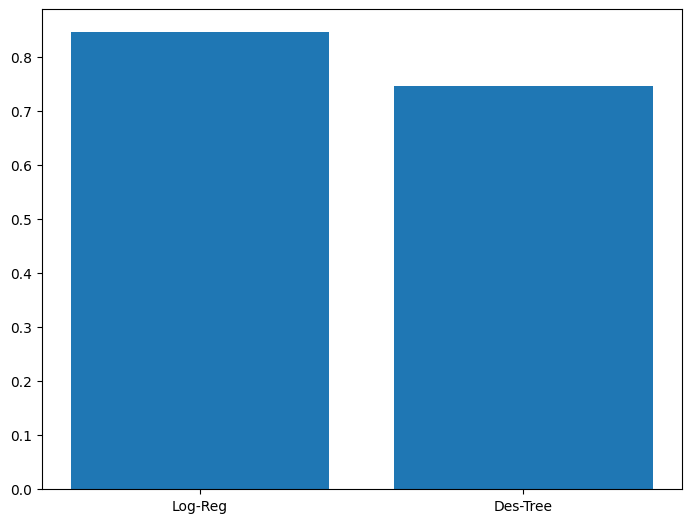

In [93]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
langs = ['Log-Reg','Des-Tree']
students = [0.84615384615384611, 0.7472527472527473] # Using the accuracy scores from previous cells
ax.bar(langs,students)
plt.show()

# **End**